## Importing Packages

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit import RDLogger
# Disabling RDKit warnings
RDLogger.DisableLog('rdApp.*')
import IPython.display as display 

### Getting file paths and reading files

In [3]:
data_dir = '../data/BBB_Martins/'
all_data_path = os.path.join(data_dir, 'BBB_Martins.csv')
train_path = os.path.join(data_dir, 'train.csv')
test_path = os.path.join(data_dir, 'test.csv')
valid_path = os.path.join(data_dir, 'valid.csv')

In [4]:
all_data = pd.read_csv(all_data_path)
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
val_df = pd.read_csv(valid_path)

In [14]:
all_data.shape

(2030, 3)

In [15]:
all_data.head()

Drug_ID                                               Drug  Y
0            Propanolol                   CC(C)NCC(O)COc1cccc2ccccc12.[Cl]  1
1  Terbutylchlorambucil             CC(C)(C)OC(=O)CCCc1ccc(N(CCCl)CCCl)cc1  1
2                 40730   CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23  1
3                    24                     CC(=O)NCCCOc1cccc(CN2CCCCC2)c1  1
4           cloxacillin  Cc1onc(-c2ccccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H...  1

In [5]:
print(f'Train data contains : {train_df.shape[0]} rows and {train_df.shape[1]} columns')
print(f'Test data contains : {test_df.shape[0]} rows and {test_df.shape[1]} columns')
print(f'Validation data contains : {val_df.shape[0]} rows and {val_df.shape[1]} columns')

Train data contains : 1421 rows and 3 columns
Test data contains : 406 rows and 3 columns
Validation data contains : 203 rows and 3 columns


In [6]:
all_data['Y'].value_counts()

Y
1    1551
0     479
Name: count, dtype: int64

In [7]:
all_data['Y'].value_counts(normalize = True)

Y
1    0.764039
0    0.235961
Name: proportion, dtype: float64

In [8]:
dfs = [(train_df,'Train'), (test_df,'Test'), (val_df,'Validation')]

In [9]:
for df, name in dfs:
    duplicate_rows = df.duplicated().sum()
    print(f'{name} - Duplicate Rows: {duplicate_rows}')


Train - Duplicate Rows: 0
Test - Duplicate Rows: 0
Validation - Duplicate Rows: 0


It appears that there are no duplicate values in the dataset per row, Next, I will check the duplicates for the Drug column in case a drug was given multiple labels

In [10]:
for df, name in dfs:
    duplicate_drugs = df[["Drug_ID","Drug"]].duplicated().sum()
    print(f"{name} - Duplicate Drugs: {duplicate_drugs}")


Train - Duplicate Drugs: 1
Test - Duplicate Drugs: 0
Validation - Duplicate Drugs: 0


We have a duplicate Drug in the dataset.

### Visualization

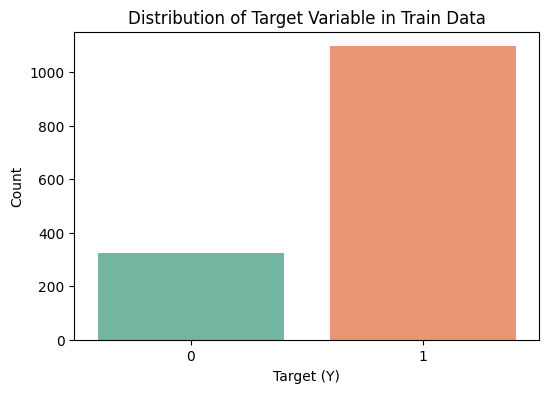

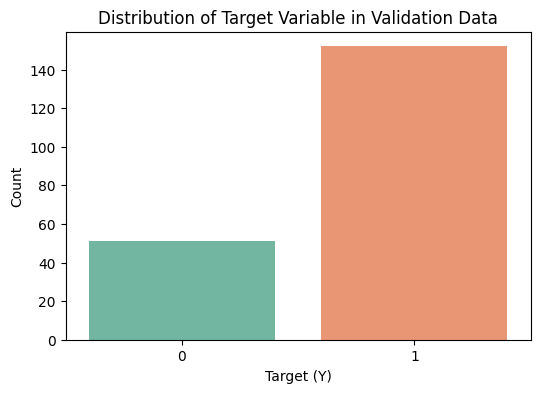

In [11]:
for df,name in dfs:
    plt.figure(figsize=(6, 4))
    sns.countplot(x="Y", data=df, hue="Y", palette="Set2", legend=False)  
    plt.xlabel("Target (Y)")
    plt.ylabel("Count")
    plt.title(f"Distribution of Target Variable in {name} Data")
    plt.show()

ðŸ“Š Plotting molecules for Train dataset (10 unique drugs)...


ðŸ“Š Plotting molecules for Test dataset (10 unique drugs)...


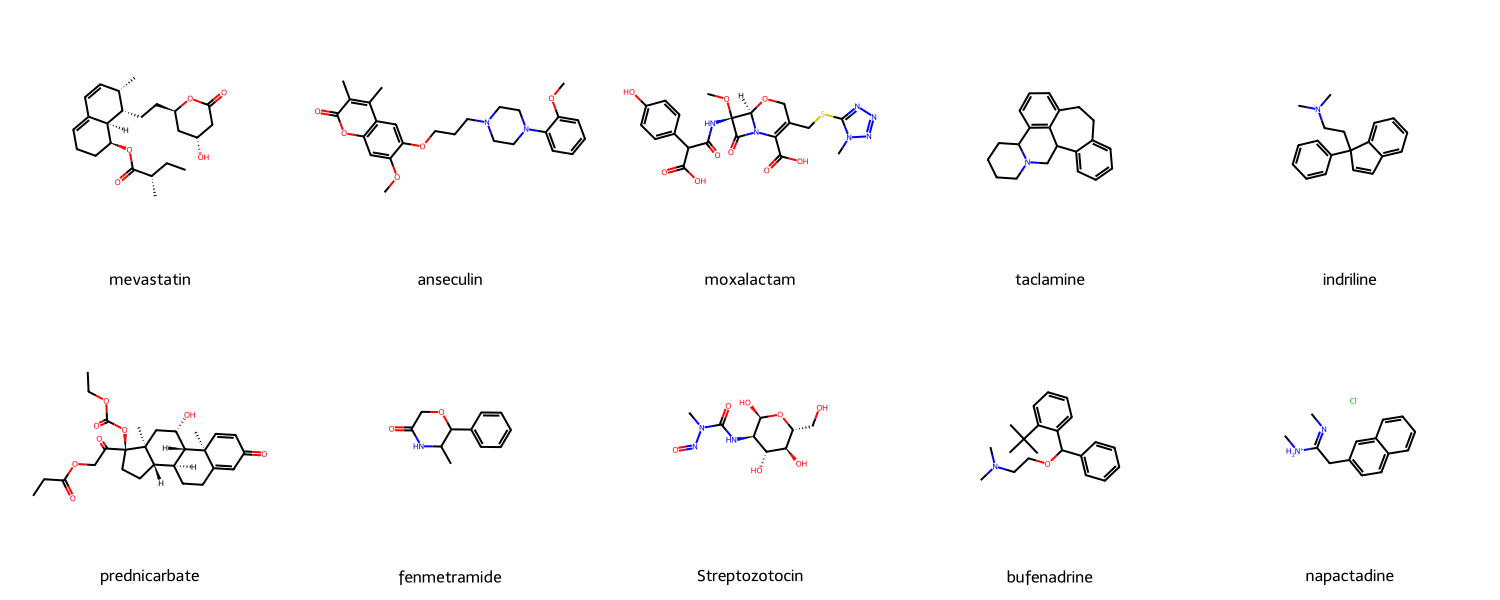

ðŸ“Š Plotting molecules for Validation dataset (10 unique drugs)...


In [12]:
for df, name in dfs:
    print(f"ðŸ“Š Plotting molecules for {name} dataset (10 unique drugs)...")  # Print message
    unique_df = df.drop_duplicates(subset=["Drug"]).head(10).copy()

    # Convert SMILES to RDKit molecules
    unique_df["Molecule"] = unique_df["Drug"].apply(lambda x: Chem.MolFromSmiles(x))

    # Generate and display the image
    img = Draw.MolsToGridImage(
        unique_df["Molecule"].tolist(), 
        molsPerRow=5, 
        subImgSize=(300, 300), 
        legends=unique_df["Drug_ID"].astype(str).tolist()  # Ensure Drug_ID is a string
    )

    display.display(img)  # Show the image


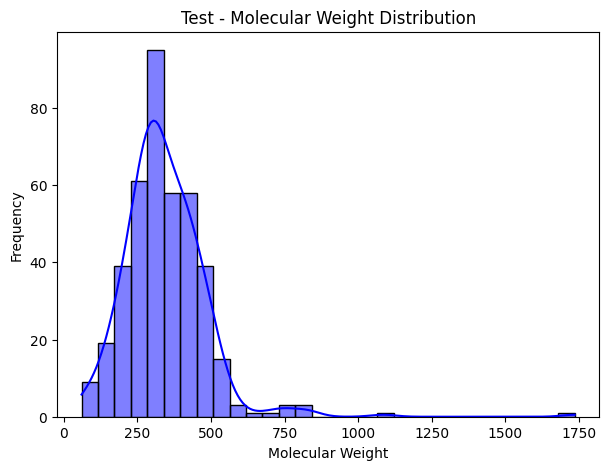

In [13]:
from rdkit.Chem import Descriptors

for df, name in dfs:
    df["MolWeight"] = df["Drug"].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))

    plt.figure(figsize=(7, 5))
    sns.histplot(df["MolWeight"], bins=30, kde=True, color="blue")
    plt.title(f"{name} - Molecular Weight Distribution")
    plt.xlabel("Molecular Weight")
    plt.ylabel("Frequency")
    plt.show()
